In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import plotly as px
import numpy as np
import missingno as msno # analyse des manquants 
import plotly.graph_objects as go #donut chart
import scipy.stats as scipy
from scipy.stats import pearsonr
from math import exp


In [ ]:
#upload dataset exploratoire
df=pd.read_csv("/content/drive/MyDrive/Projet4_ConsoElec/dataset.csv")


In [ ]:
dataset=df

In [ ]:
#j'enlève energystrascore pour la modélisation de l'énergie
dataset_E=dataset[['OSEBuildingID', 'Neighborhood', 'Year_slice',
       'NbFloors_slice', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)', 
       'Bin_SteamUse(kBtu)', 'Bin_NaturalGas(kBtu)',
       'Bin_OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
       'log_SiteEnergyUse(kBtu)',  'log_GHGEmissions(MetricTonsCO2e)',
       'log_LargestPropertyUseTypeGFA']]


## Corrélations des variables

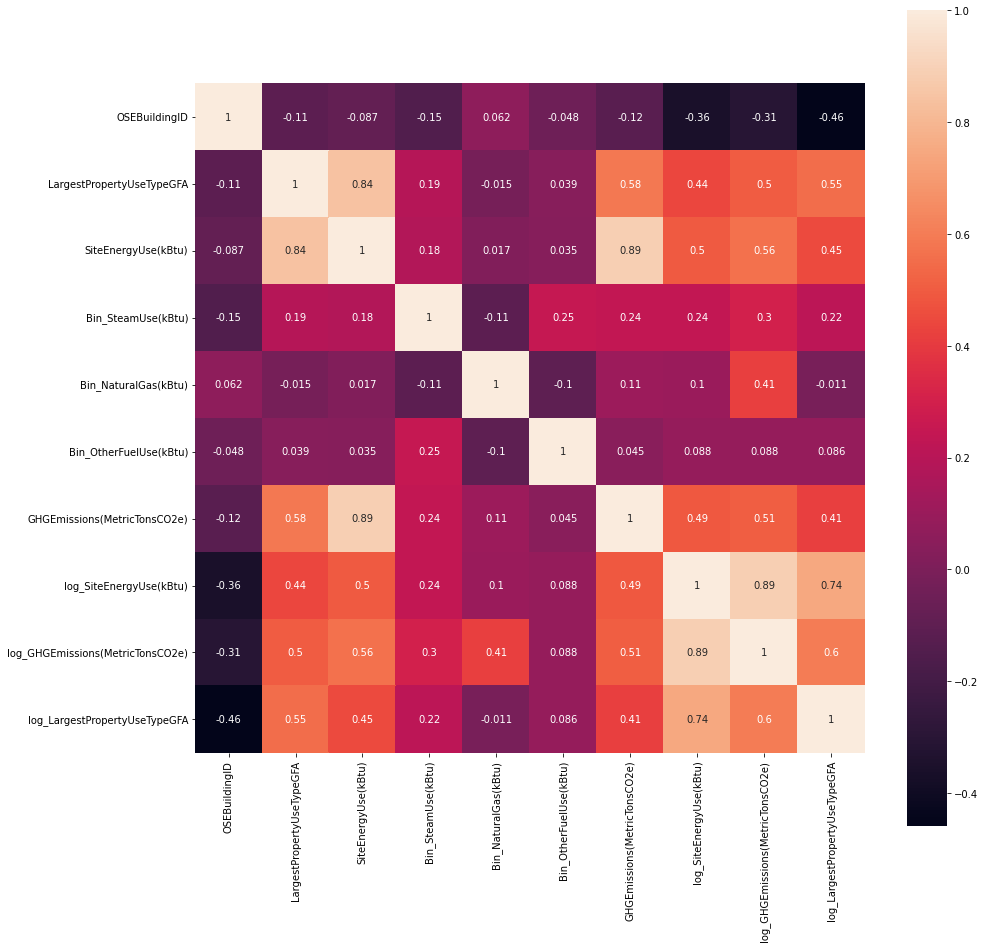

In [ ]:
# Matrice des corrélations
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(dataset_E.corr(),annot = True, square=True)

In [ ]:
dataset_E.dropna(0, inplace=True) # comme j'uilise ce dataset pour la régression je préfère droper les données manquantes plutôt que les approximer 

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
dataset_E.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1552 entries, 43 to 1609
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   OSEBuildingID                     1552 non-null   int64  
 1   Neighborhood                      1552 non-null   object 
 2   Year_slice                        1552 non-null   object 
 3   NbFloors_slice                    1552 non-null   object 
 4   LargestPropertyUseType            1552 non-null   object 
 5   LargestPropertyUseTypeGFA         1552 non-null   float64
 6   SiteEnergyUse(kBtu)               1552 non-null   float64
 7   Bin_SteamUse(kBtu)                1552 non-null   int64  
 8   Bin_NaturalGas(kBtu)              1552 non-null   int64  
 9   Bin_OtherFuelUse(kBtu)            1552 non-null   int64  
 10  GHGEmissions(MetricTonsCO2e)      1552 non-null   float64
 11  log_SiteEnergyUse(kBtu)           1552 non-null   float64
 12  log_G

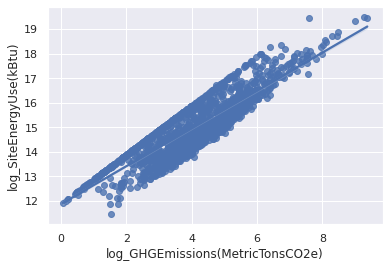

In [ ]:
#Corrélation émissionsCO2/Energie
sns.set_theme(color_codes=True)

ax=sns.regplot(x="log_GHGEmissions(MetricTonsCO2e)", y='log_SiteEnergyUse(kBtu)', data=dataset_E)
#on va prédire les emissions à partir de l'énergie (r=0.89)

In [ ]:
X=dataset_E["log_GHGEmissions(MetricTonsCO2e)"]
Y=dataset_E['log_SiteEnergyUse(kBtu)']
corr, _ = pearsonr(X, Y)
print(corr)

0.8867841380835454


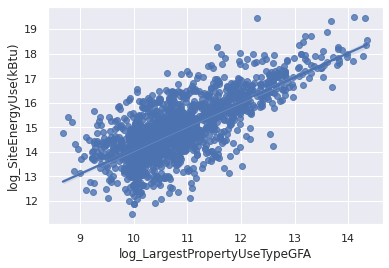

In [ ]:
#Corrélation Surface/Energie
sns.set_theme(color_codes=True)
ax=sns.regplot(x= 'log_LargestPropertyUseTypeGFA', y='log_SiteEnergyUse(kBtu)', data=dataset_E)


In [ ]:
X=dataset_E['log_LargestPropertyUseTypeGFA']
Y=dataset_E['log_SiteEnergyUse(kBtu)']
corr, _ = pearsonr(X, Y)
print(corr)

0.7388898396710487


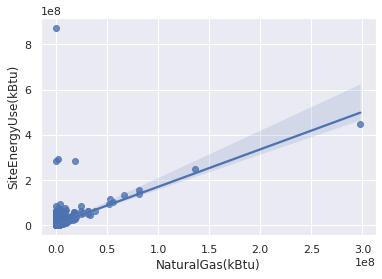

In [ ]:
#Corrélation Gaz/Energie
sns.set_theme(color_codes=True)

sns.regplot(x='NaturalGas(kBtu)', y='SiteEnergyUse(kBtu)', data=dataset)
#la variable steamUse peut aider à prédire l'énergie tout comme le gaz et la surface 

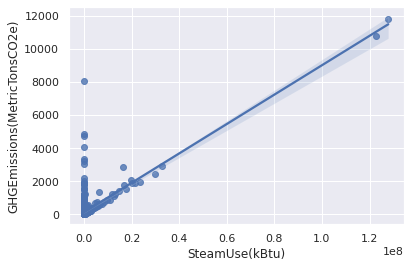

In [ ]:
#Corrélation émissionsCO2/Energie
sns.set_theme(color_codes=True)

ax=sns.regplot(x='SteamUse(kBtu)', y='GHGEmissions(MetricTonsCO2e)', data=dataset)

Interprétations : Les analyses statistiques et les corrélations me permettent d'établir une liste de variables importantes dans la modélisation des consommations d'néergie et prédictions des émissions de CO2. 

Modèle énergie totale: L'énergie est corrélée à la surface et aux nb d'étges des bâtiments ainsi qu' aux dépenses d'énergies (électricité, gaz et vapeur d'eau). Ces énergies sont binarisées puisqu'on est censé ne pas connaître leur valeurs futures. La binarisation permet de se baser sur la ou les différentes sources d'énergie utilisée par les bâtiments. 


Les variables non numériques sont encodées pour la modélisation
Les énergies sont binarisées. Cela abolit l'importance de l'électricité dans le model énergie car plus de 99,7% des bâtiments utilisent l'électricité.
 
Modèle émissions de CO2:Les émissions de CO2 dépendent de l'énergie consommée. Ce sont les mêmes variables que pour le modèle de prédiction de l'énergie qui sont corrélées aux émissions de CO2. Ce sont juste les intensités de corrélation qui varient. 

Remarque: L'EnergyStarScore n'est corrélée à aucune variable comme le montrait la matrice des corrélations. On evaluera son importance dans le modèle de prédiction des émissions de CO2. 
L'intensité de la relation entre dépenses énergies ou les émissions de C02 avec la variable neighboord est faible (np2=0,012, np2=0,015). je ne conserve pas cette variable pour la modélisation car son encodage est complexe. 


In [ ]:
dataset_E.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1552 entries, 43 to 1609
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   OSEBuildingID                     1552 non-null   int64  
 1   Neighborhood                      1552 non-null   object 
 2   Year_slice                        1552 non-null   object 
 3   NbFloors_slice                    1552 non-null   object 
 4   LargestPropertyUseType            1552 non-null   object 
 5   LargestPropertyUseTypeGFA         1552 non-null   float64
 6   SiteEnergyUse(kBtu)               1552 non-null   float64
 7   Bin_SteamUse(kBtu)                1552 non-null   int64  
 8   Bin_NaturalGas(kBtu)              1552 non-null   int64  
 9   Bin_OtherFuelUse(kBtu)            1552 non-null   int64  
 10  GHGEmissions(MetricTonsCO2e)      1552 non-null   float64
 11  log_SiteEnergyUse(kBtu)           1552 non-null   float64
 12  log_G

In [ ]:
#j'enregistre ce dataset pour passer au Notebook modélisation
dataset_E.to_csv(r"C:\Users\33622\Documents\Projet4_ConsoElec\dataset_E.csv",index=False)

# PARTIE 3 : Modélisation 

In [ ]:
dataset_E.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1552 entries, 43 to 1609
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   OSEBuildingID                     1552 non-null   int64  
 1   Neighborhood                      1552 non-null   object 
 2   Year_slice                        1552 non-null   object 
 3   NbFloors_slice                    1552 non-null   object 
 4   LargestPropertyUseType            1552 non-null   object 
 5   LargestPropertyUseTypeGFA         1552 non-null   float64
 6   SiteEnergyUse(kBtu)               1552 non-null   float64
 7   Bin_SteamUse(kBtu)                1552 non-null   int64  
 8   Bin_NaturalGas(kBtu)              1552 non-null   int64  
 9   Bin_OtherFuelUse(kBtu)            1552 non-null   int64  
 10  GHGEmissions(MetricTonsCO2e)      1552 non-null   float64
 11  log_SiteEnergyUse(kBtu)           1552 non-null   float64
 12  log_G

La variable Bin_Electricity est retirée de la modélisation car elle n'apporte rien au modèle puisque tous les bâtiments utilisent l'électricité. 

## Encoding des variables
Cas des variables catégorielles :
les types de bâtiments ("LargestPropertyuseType"), l'ancienneté des bâtiments (Years_slice), le nb d'étages (Nb_Floors_slice)   

### Label Encoding pour les variables discrètes 

Pour les variables discrètes (variable Nbétages et les années de construction)

In [ ]:
dataset_E.describe()

,OSEBuildingID,LargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),Bin_SteamUse(kBtu),Bin_NaturalGas(kBtu),Bin_OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),log_SiteEnergyUse(kBtu),log_GHGEmissions(MetricTonsCO2e),log_LargestPropertyUseTypeGFA
count,1552.000000,1.552000e+03,1.552000e+03,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000
mean,15431.021263,9.233983e+04,7.724407e+06,0.068943,0.725515,0.008376,168.867139,14.920851,3.952613,10.847573
std,12869.447067,1.610862e+05,1.918183e+07,0.253439,0.446398,0.091167,572.754725,1.263908,1.452969,0.948900
min,1.000000,5.872000e+03,9.385100e+04,0.000000,0.000000,0.000000,1.060000,11.449464,0.058269,8.677951
25%,576.750000,2.556075e+04,1.243676e+06,0.000000,0.000000,0.000000,20.145000,14.033582,3.002955,10.148813
50%,20986.500000,4.319400e+04,2.512737e+06,0.000000,1.000000,0.000000,49.060000,14.736883,3.893044,10.673457
75%,24438.250000,8.914825e+04,6.867494e+06,0.000000,1.000000,0.000000,138.430000,15.742309,4.930365,11.398056
max,50038.000000,1.719643e+06,2.958126e+08,1.000000,1.000000,1.000000,11824.890000,19.505237,9.377962,14.357627


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
dataset_E['enc_Year_slice']=le.fit_transform(dataset_E['Year_slice'])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
dataset_E['enc_NbFloors']=le.fit_transform(dataset_E['NbFloors_slice'])



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
dataset_E.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1552 entries, 43 to 1609
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   OSEBuildingID                     1552 non-null   int64  
 1   Neighborhood                      1552 non-null   object 
 2   Year_slice                        1552 non-null   object 
 3   NbFloors_slice                    1552 non-null   object 
 4   LargestPropertyUseType            1552 non-null   object 
 5   LargestPropertyUseTypeGFA         1552 non-null   float64
 6   SiteEnergyUse(kBtu)               1552 non-null   float64
 7   Bin_SteamUse(kBtu)                1552 non-null   int64  
 8   Bin_NaturalGas(kBtu)              1552 non-null   int64  
 9   Bin_OtherFuelUse(kBtu)            1552 non-null   int64  
 10  GHGEmissions(MetricTonsCO2e)      1552 non-null   float64
 11  log_SiteEnergyUse(kBtu)           1552 non-null   float64
 12  log_G

In [ ]:
# scaling and dataset split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


### Target mean encoding : 
encodage par la moyenne de la cible 

In [ ]:
dataset_E.reset_index()

,index,OSEBuildingID,Neighborhood,Year_slice,NbFloors_slice,LargestPropertyUseType,LargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),Bin_SteamUse(kBtu),Bin_NaturalGas(kBtu),Bin_OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),log_SiteEnergyUse(kBtu),log_GHGEmissions(MetricTonsCO2e),log_LargestPropertyUseTypeGFA,enc_Year_slice,enc_NbFloors
0,43,1,DOWNTOWN,1920-1929,30-40,Hotel,88434.0,6981428.0,1,1,0,249.43,15.758764,5.519178,11.390012,2,3
1,44,2,DOWNTOWN,1990-1999,30-40,Hotel,83880.0,8354235.0,0,1,0,263.51,15.938279,5.574091,11.337142,9,3
2,45,3,DOWNTOWN,1960-1969,30-40,Hotel,757243.0,73130656.0,1,1,0,2061.48,18.107758,7.631179,13.537439,6,3
3,46,5,DOWNTOWN,1920-1929,30-40,Hotel,61320.0,28229320.0,1,1,0,1936.34,17.155872,7.568555,11.023861,2,3
4,47,8,DOWNTOWN,1970-1979,30-40,Hotel,123445.0,14829099.0,0,1,0,507.70,16.512102,6.229891,11.723551,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,1603,49946,BALLARD,2010-2019,30-40,Supermarket/Grocery Store,41198.0,6879291.0,0,1,0,75.28,15.744026,4.321214,10.626145,11,3
1548,1606,49985,LAKE UNION,2010-2019,30-40,Office,427181.0,16730779.0,0,1,0,210.69,16.632761,5.350388,12.964963,11,3
1549,1607,49998,SOUTHEAST,2010-2019,20-30,Self-Storage Facility,87576.0,850568.0,0,1,0,12.40,13.653660,2.517696,11.380262,11,2
1550,1608,50002,NORTHEAST,2010-2019,20-30,Parking,83600.0,1389553.0,0,0,0,9.69,14.144493,2.271094,11.333799,11,2


In [ ]:
meandata =dataset_E[['OSEBuildingID', 'LargestPropertyUseType', 'enc_Year_slice', 'enc_NbFloors', 'Bin_SteamUse(kBtu)', 'Bin_NaturalGas(kBtu)', 'log_LargestPropertyUseTypeGFA', 'log_SiteEnergyUse(kBtu)']]
       # je garde 'OSEBuildingID' pour pouvoir les mettre en index: retrouver mes predictions "énergie" pour les appliquer au modéle de prediction des émisisons CO2

In [ ]:
meandata.reset_index()

,index,OSEBuildingID,LargestPropertyUseType,enc_Year_slice,enc_NbFloors,Bin_SteamUse(kBtu),Bin_NaturalGas(kBtu),log_LargestPropertyUseTypeGFA,log_SiteEnergyUse(kBtu)
0,43,1,Hotel,2,3,1,1,11.390012,15.758764
1,44,2,Hotel,9,3,0,1,11.337142,15.938279
2,45,3,Hotel,6,3,1,1,13.537439,18.107758
3,46,5,Hotel,2,3,1,1,11.023861,17.155872
4,47,8,Hotel,7,3,0,1,11.723551,16.512102
...,...,...,...,...,...,...,...,...,...
1547,1603,49946,Supermarket/Grocery Store,11,3,0,1,10.626145,15.744026
1548,1606,49985,Office,11,3,0,1,12.964963,16.632761
1549,1607,49998,Self-Storage Facility,11,2,0,1,11.380262,13.653660
1550,1608,50002,Parking,11,2,0,0,11.333799,14.144493


In [ ]:
meandata.head(100)

,OSEBuildingID,LargestPropertyUseType,enc_Year_slice,enc_NbFloors,Bin_SteamUse(kBtu),Bin_NaturalGas(kBtu),log_LargestPropertyUseTypeGFA,log_SiteEnergyUse(kBtu)
43,1,Hotel,2,3,1,1,11.390012,15.758764
44,2,Hotel,9,3,0,1,11.337142,15.938279
45,3,Hotel,6,3,1,1,13.537439,18.107758
46,5,Hotel,2,3,1,1,11.023861,17.155872
47,8,Hotel,7,3,0,1,11.723551,16.512102
48,9,Police Station,9,1,0,1,11.394480,16.304740
49,10,Hotel,2,3,0,1,11.306541,15.648547
50,11,Other - Entertainment/Public Assembly,2,3,1,1,11.540161,15.675866
51,12,Hotel,0,3,0,1,12.007524,16.351882
52,16,Hotel,9,3,1,1,12.726769,17.137557


In [ ]:
meandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1552 entries, 43 to 1609
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OSEBuildingID                  1552 non-null   int64  
 1   LargestPropertyUseType         1552 non-null   object 
 2   enc_Year_slice                 1552 non-null   int64  
 3   enc_NbFloors                   1552 non-null   int64  
 4   Bin_SteamUse(kBtu)             1552 non-null   int64  
 5   Bin_NaturalGas(kBtu)           1552 non-null   int64  
 6   log_LargestPropertyUseTypeGFA  1552 non-null   float64
 7   log_SiteEnergyUse(kBtu)        1552 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 109.1+ KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(meandata[['OSEBuildingID','LargestPropertyUseType', 'log_SiteEnergyUse(kBtu)', 'enc_Year_slice', 'enc_NbFloors', 'Bin_SteamUse(kBtu)', 'Bin_NaturalGas(kBtu)', 'log_LargestPropertyUseTypeGFA']],
        meandata['log_SiteEnergyUse(kBtu)'], test_size=0.2, random_state=100) #I am setting the random state which means the results will be the same each time I run the split for reproducible results.

In [ ]:
X_train.head()

,OSEBuildingID,LargestPropertyUseType,log_SiteEnergyUse(kBtu),enc_Year_slice,enc_NbFloors,Bin_SteamUse(kBtu),Bin_NaturalGas(kBtu),log_LargestPropertyUseTypeGFA
1592,49859,Other,18.875612,10,2,0,1,13.602961
300,408,Office,15.712342,2,3,1,1,11.429609
1439,26838,Hotel,13.965766,0,3,0,1,10.610340
1559,40348,Retail Store,16.424556,1,1,0,1,11.967879
1201,24351,Non-Refrigerated Warehouse,14.664441,1,2,0,1,10.966645


In [ ]:
#Calcul target frequency pour chaque LargestPropertyUseType' selon la valeur log_SiteEnergyUse(kBtu) en utilisant groupby()
target_freq=X_train.groupby(['LargestPropertyUseType'])['log_SiteEnergyUse(kBtu)'].mean()
target_freq

LargestPropertyUseType
Adult Education                                         14.508979
Automobile Dealership                                   14.668363
Bank Branch                                             14.090533
College/University                                      15.689957
Convention Center                                       18.161451
Courthouse                                              17.792059
Data Center                                             18.383366
Distribution Center                                     13.951812
Financial Office                                        14.455296
Fire Station                                            14.983634
Fitness Center/Health Club/Gym                          15.439356
Food Service                                            12.538038
Hospital (General Medical & Surgical)                   18.203096
Hotel                                                   15.668618
K-12 School                                          

In [ ]:
#Convertir en dictionnaire
ordered_target_freq=target_freq.to_dict()
ordered_target_freq

{'Adult Education': 14.50897925438873,
 'Automobile Dealership': 14.668362741956297,
 'Bank Branch': 14.090533325098022,
 'College/University': 15.689957030659638,
 'Convention Center': 18.161450945908346,
 'Courthouse': 17.79205923444743,
 'Data Center': 18.383366108118857,
 'Distribution Center': 13.951811537667957,
 'Financial Office': 14.455296486716108,
 'Fire Station': 14.98363429474634,
 'Fitness Center/Health Club/Gym': 15.439356191451068,
 'Food Service': 12.538038314239714,
 'Hospital (General Medical & Surgical)': 18.203095602659445,
 'Hotel': 15.668617805054117,
 'K-12 School': 14.724218831417588,
 'Laboratory': 17.121343734174275,
 'Library': 14.051592090971374,
 'Lifestyle Center': 16.738838301246908,
 'Manufacturing/Industrial Plant': 14.051867637548492,
 'Medical Office': 15.624807180006291,
 'Movie Theater': 14.860855675606915,
 'Multifamily Housing': 14.606640022978887,
 'Museum': 15.087716758655516,
 'Non-Refrigerated Warehouse': 14.0278777968672,
 'Office': 15.16798

In [ ]:
# Les fréquences ont été calculées sur le train seulement et sont mappées sur le test 

X_train['Enc_LargestPropertyType']=X_train.LargestPropertyUseType.map(ordered_target_freq)
X_test['Enc_LargestPropertyType']=X_test.LargestPropertyUseType.map(ordered_target_freq)


In [ ]:
X_train.head(10) #mon jeu d'entrainement avec toutes mes variables encodées. je dois droper la variable catégorielle LargestPropertyUseType (puisque j'ai réalisé l'encoding)

,OSEBuildingID,LargestPropertyUseType,log_SiteEnergyUse(kBtu),enc_Year_slice,enc_NbFloors,Bin_SteamUse(kBtu),Bin_NaturalGas(kBtu),log_LargestPropertyUseTypeGFA,Enc_LargestPropertyType
1592,49859,Other,18.875612,10,2,0,1,13.602961,15.200600
300,408,Office,15.712342,2,3,1,1,11.429609,15.167983
1439,26838,Hotel,13.965766,0,3,0,1,10.610340,15.668618
1559,40348,Retail Store,16.424556,1,1,0,1,11.967879,14.813198
1201,24351,Non-Refrigerated Warehouse,14.664441,1,2,0,1,10.966645,14.027878
62,29,Hotel,15.171553,10,3,0,1,10.968302,15.668618
1595,49867,Office,14.960153,11,3,0,1,12.161771,15.167983
1127,23867,Office,14.487809,1,2,0,1,10.446538,15.167983
1198,24333,Non-Refrigerated Warehouse,13.119850,6,0,0,0,10.503148,14.027878
1208,24381,Fitness Center/Health Club/Gym,14.861380,9,0,0,1,9.552582,15.439356


In [ ]:
X_test.shape

(311, 9)

Text(0, 0.5, 'log_SiteEnergyUse(kBtu)')

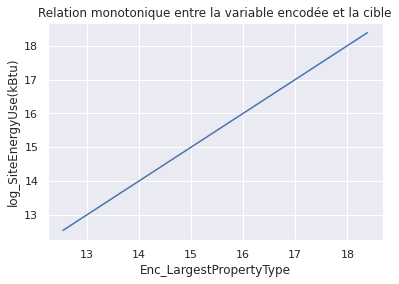

In [ ]:
fig=plt.figure()
fig=X_train.groupby(['Enc_LargestPropertyType'])['log_SiteEnergyUse(kBtu)'].mean().plot()
fig.set_title('Relation monotonique entre la variable encodée et la cible')
fig.set_ylabel('log_SiteEnergyUse(kBtu)')

In [ ]:
X_train

,OSEBuildingID,LargestPropertyUseType,log_SiteEnergyUse(kBtu),enc_Year_slice,enc_NbFloors,Bin_SteamUse(kBtu),Bin_NaturalGas(kBtu),log_LargestPropertyUseTypeGFA,Enc_LargestPropertyType
1592,49859,Other,18.875612,10,2,0,1,13.602961,15.200600
300,408,Office,15.712342,2,3,1,1,11.429609,15.167983
1439,26838,Hotel,13.965766,0,3,0,1,10.610340,15.668618
1559,40348,Retail Store,16.424556,1,1,0,1,11.967879,14.813198
1201,24351,Non-Refrigerated Warehouse,14.664441,1,2,0,1,10.966645,14.027878
...,...,...,...,...,...,...,...,...,...
96,86,Hotel,15.196574,11,3,0,1,11.056762,15.668618
394,532,Parking,16.643887,11,3,0,1,12.114253,15.779722
123,130,K-12 School,14.938034,5,1,0,1,11.442696,14.724219
837,21125,Office,14.155168,10,3,0,0,9.674577,15.167983


The main advantage of mean encoding is that it does not expand the feature space and captures information within the labels which makes it more predictive. But sometimes this technique leads to the problem of overfitting.

In [ ]:
# je drope les colonnes pour la régression : colonne SiteEnergy (puisque c'est ce qu'on prédit) et Largestproperty qui est maintenant encodée 
X_test.drop(['LargestPropertyUseType'],axis=1, inplace=True)
X_train.drop(['LargestPropertyUseType'],axis=1, inplace=True)


In [ ]:
data_reg=X_train[['Enc_LargestPropertyType', 'enc_Year_slice', 'enc_NbFloors', 'Bin_SteamUse(kBtu)','Bin_NaturalGas(kBtu)', 'log_LargestPropertyUseTypeGFA','log_SiteEnergyUse(kBtu)']]

In [ ]:

X=data_reg[data_reg.columns[:-1]]
y=data_reg['log_SiteEnergyUse(kBtu)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

In [ ]:
X_train

,Enc_LargestPropertyType,enc_Year_slice,enc_NbFloors,Bin_SteamUse(kBtu),Bin_NaturalGas(kBtu),log_LargestPropertyUseTypeGFA
1201,14.027878,1,2,0,1,10.966645
666,15.624807,3,1,0,1,11.106280
1338,14.813198,2,0,0,1,10.736397
597,14.027878,5,0,0,0,10.949051
1536,15.167983,10,3,0,0,12.548122
...,...,...,...,...,...,...
1403,14.813198,4,2,0,1,9.587749
1004,14.051592,10,0,0,1,9.615805
1599,15.415933,11,0,0,1,10.473365
968,13.951812,1,0,0,1,10.149566


## Prédire l'énergie consommée

In [ ]:
from sklearn import linear_model
import numpy as np

# OLS (moindres carrés), Ridge
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import RandomizedSearchCV 

# model evaluation
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score



In [ ]:
pip install shap # interprétation des variables dans le modèle 

In [ ]:
import shap

### Modèle linéaire (baseline)

In [ ]:
#Modèle de régression linéaire
lr = linear_model.LinearRegression()

In [ ]:
# évaluation du modèle en CV sur le jeu d'entrainement :
MSE_lr_baseline= cross_val_score (lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error') 
r2_lr_baseline= cross_val_score (lr, X_train, y_train, cv=5, scoring='r2')

In [ ]:
MSE_lr_baseline # la MSE sur 5 folds

array([-0.42449759, -0.6139603 , -0.40222608, -0.44124821, -0.45538237])

In [ ]:
MSE_lr_baseline
np.mean(MSE_lr_baseline*(-1))

0.4674629098609889

In [ ]:
r2_lr_baseline
np.mean(r2_lr_baseline)

0.6938537729319632

In [ ]:
# On entraîne ce modèle sur les données d'entrainement
%timeit lr.fit(X_train, y_train)


1000 loops, best of 5: 1.94 ms per loop


In [ ]:
df_coef_lr= pd.DataFrame(lr.coef_, index=X_train.columns)  
df_coef_lr.columns=['lr Baseline']
df_coef_lr

,lr Baseline
Enc_LargestPropertyType,0.632611
enc_Year_slice,0.025429
enc_NbFloors,0.053698
Bin_SteamUse(kBtu),0.402141
Bin_NaturalGas(kBtu),0.386596
log_LargestPropertyUseTypeGFA,0.775351


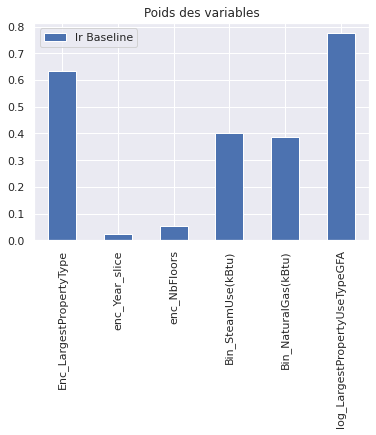

In [ ]:
df_coef_lr.plot.bar(title='Poids des variables')

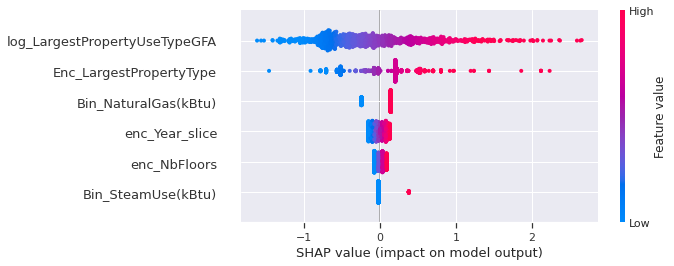

In [ ]:
explainer = shap.LinearExplainer(lr, X_train)
shap_values = explainer.shap_values(X_train)
f = plt.figure()
shap.summary_plot(shap_values, X_train)

In [ ]:
#j'applique le modèle pour prédire l'énergie
y_pred = lr.predict(X_test)

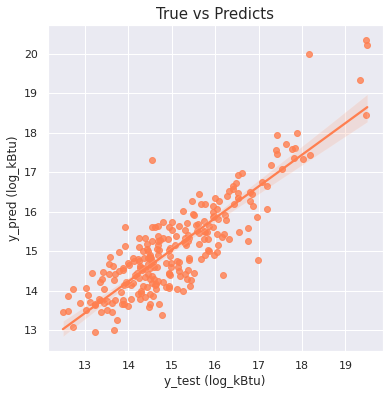

In [ ]:
plt.figure(figsize = ( 6 , 6 )) 
  
sns.regplot(x=y_test, y=y_pred, color='coral') #true vs predict
  
plt.xlabel( "y_test (log_kBtu)" , size = 12 ) 
  
plt.ylabel(  "y_pred (log_kBtu)"  , size = 12 ) 
  
plt.title( "True vs Predicts" , size = 15 ) 
  
plt.show() 

In [ ]:
# regression intercept
print('Intercept:' ,lr.intercept_)
#r2 sur le jeu test
print ('R2 :', lr.score(X_test, y_test)) 

Intercept: -3.4411521935686764
R2 : 0.736148371691264


In [ ]:
#Evaluation du modèle :
# sur le jeu train en cross validation :
print ('MSE_baseline (lr, CV):', np.mean(MSE_lr_baseline*(-1)))
print ('r2_baseline (lr, CV):', np.mean(r2_lr_baseline))

#Sur les prédictions :
print ('r2_baseline (lr, pred):', r2_score (y_test, y_pred))
print ('MSE (lr, pred):', mean_squared_error (y_test, y_pred))


MSE_baseline (lr, CV): 0.4674629098609889
r2_baseline (lr, CV): 0.6938537729319632
r2_baseline (lr, pred): 0.736148371691264
MSE (lr, pred): 0.45358615115805767


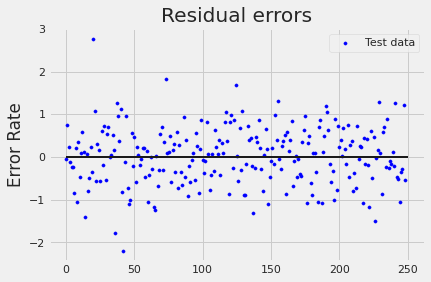

In [ ]:
df_y_pred = pd.DataFrame(y_pred)

# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 

## plotting residual errors in test data
plt.scatter(x=df_y_pred.index, y=lr.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 250, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.ylabel('Error Rate')
plt.title("Residual errors")

 
## function to show plot
plt.show()


 L'error rate est centrée sur 0  elle est stable au fur et à mesure des prédictions 

### Regression Ridge

In [ ]:
n_alphas = 200
alphas=np.logspace(-3, 3, n_alphas) # recherche du terme de régularisation optimal 

In [ ]:
# Entraînement du modèle 
from sklearn.linear_model import Ridge
ridge = linear_model.Ridge()

coefs = []
squared_r = []
errors_MSE = []

for a in alphas:
    ridge.set_params(alpha=a) 
    ridge.fit(X_train, y_train)
    score_MSE_R=cross_val_score (ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    score_r2_R=cross_val_score (ridge, X_train, y_train, cv=5, scoring='r2')
    coefs.append(ridge.coef_)
    squared_r.append([np.mean(r2_lr_baseline), np.mean(score_r2_R)])
    errors_MSE.append([np.mean(MSE_lr_baseline*(-1)), -np.mean(score_MSE_R)])
  

In [ ]:
 errors_MSE #baseline vs Regularisation par alpha (boucle)


[[0.4674629098609889, 0.4674628906857093],
 [0.4674629098609889, 0.4674628893078193],
 [0.4674629098609889, 0.4674628878309671],
 [0.4674629098609889, 0.46746288624805243],
 [0.4674629098609889, 0.4674628845514676],
 [0.4674629098609889, 0.46746288273305864],
 [0.4674629098609889, 0.46746288078409004],
 [0.4674629098609889, 0.46746287869519965],
 [0.4674629098609889, 0.46746287645635787],
 [0.4674629098609889, 0.46746287405681697],
 [0.4674629098609889, 0.4674628714850623],
 [0.4674629098609889, 0.4674628687287562],
 [0.4674629098609889, 0.4674628657746817],
 [0.4674629098609889, 0.4674628626086781],
 [0.4674629098609889, 0.46746285921557584],
 [0.4674629098609889, 0.4674628555791235],
 [0.4674629098609889, 0.4674628516819147],
 [0.4674629098609889, 0.4674628475053023],
 [0.4674629098609889, 0.46746284302931507],
 [0.4674629098609889, 0.46746283823256335],
 [0.4674629098609889, 0.46746283309213765],
 [0.4674629098609889, 0.4674628275835058],
 [0.4674629098609889, 0.46746282168039766],


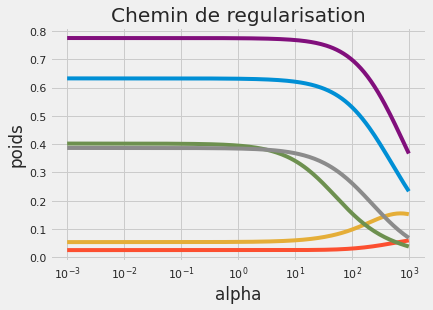

In [ ]:
#Chemin de régularisation 
import matplotlib.pyplot as plt

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('poids')
plt.title( 'Chemin de regularisation')
plt.axis('tight')
plt.show()

In [ ]:
ridge.coef_  # Les coef du dernier alpha


array([0.23349147, 0.05962411, 0.15213607, 0.03812371, 0.06881679,
       0.36695233])

La valeur de alpha diminue les poids des variables dans la régression. Voyons pour quel alpha obtient t-on l'erreur quadratique la plus faible.

Cette régularisation évite l'overfitting en limitant les poids des variables dans le modèle.

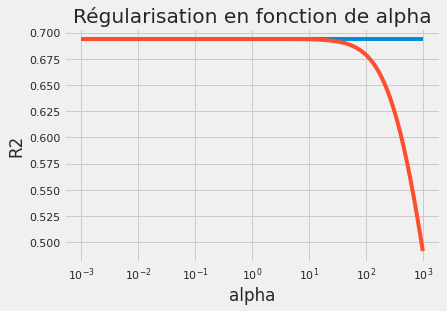

In [ ]:
# Evolution de R2 en fonction du coeff alpha 
ax = plt.gca()

ax.plot(alphas, squared_r)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title("Régularisation en fonction de alpha")
plt.axis('tight')
plt.show()

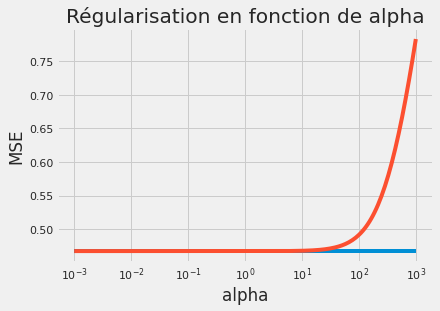

In [ ]:

ax = plt.gca()

ax.plot(alphas, errors_MSE)
ax.set_xscale('log')
plt.title("Régularisation en fonction de alpha")
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.axis('tight')
plt.show()

In [ ]:
min(errors_MSE) #baseline error (en cross-validation) vs min erreur avec alpha optimal

[0.4674629098609889, 0.46745154871971656]

In [ ]:
# Fonction qui recherche l'erreur minimale et donne son index
def min_alpha(errors):
  index=0
  min_val=10
  for i, error in enumerate (errors): #fonction qui à chaque boucle écrase min val et index
    if error[1]<min_val:
      min_val=error[1]
      index=i
  return index #on stocke l'index de l'erreur minimale et à chaque fois qu'on trouve une erreur plus petite on remplace l'index et le min val de maniere à mettre à jour la valeur la plus petite. 
 

In [ ]:
index=min_alpha(errors_MSE)

In [ ]:
index

102

In [ ]:
errors_MSE[index]  #erreur de base vs erreur minimale obtenue avec l'alpha optimal 

[0.4674629098609889, 0.46745154871971656]

In [ ]:
len(alphas)

200

In [ ]:
round(alphas[index], 3) #valeur de l'alpha optimal 

1.19

Je relance la régression ridge avec l'alpha optimal (ridge_b) calculé sur le train avec une cross validation (eviter l'overfitting). 


In [ ]:
#j'applique le meilleur alpha sur le modèle Ridge
ridge_b = linear_model.Ridge(alpha=alphas[index])
%timeit ridge_b.fit(X_train, y_train)

The slowest run took 4.26 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 5: 3.47 ms per loop


In [ ]:
# poids des variables dans le modèle régularisé Ridge 
ridge_b.coef_

array([0.63121967, 0.0254308 , 0.05448297, 0.39369179, 0.3842488 ,
       0.77454658])

In [ ]:
df_coef_ridge_b= pd.DataFrame(ridge_b.coef_, index=X_train.columns)
df_coef_ridge_b.columns=['Ridge']
df_coef_ridge_b

,Ridge
Enc_LargestPropertyType,0.631220
enc_Year_slice,0.025431
enc_NbFloors,0.054483
Bin_SteamUse(kBtu),0.393692
Bin_NaturalGas(kBtu),0.384249
log_LargestPropertyUseTypeGFA,0.774547


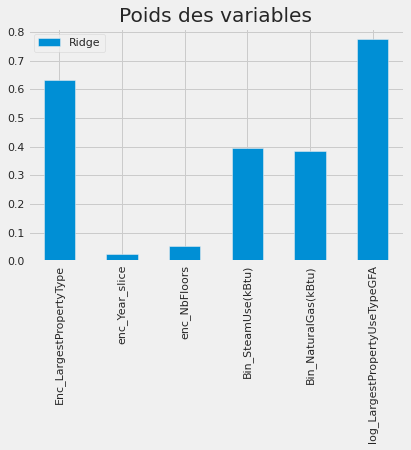

In [ ]:
df_coef_ridge_b.plot.bar(title='Poids des variables')

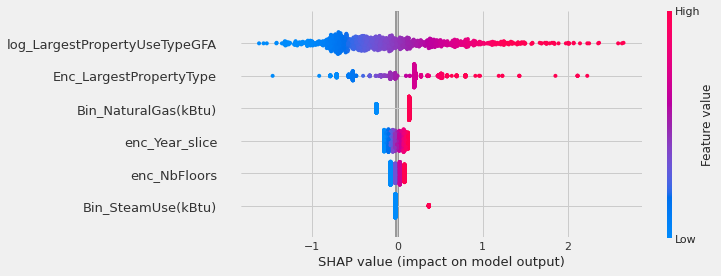

In [ ]:
explainer = shap.LinearExplainer(ridge_b, X_train)
shap_values = explainer.shap_values(X_train)
f = plt.figure()
shap.summary_plot(shap_values, X_train)

In [ ]:
#j'applique le modèle pour prédire l'énergie
y_pred_ridge=ridge_b.predict(X_test)

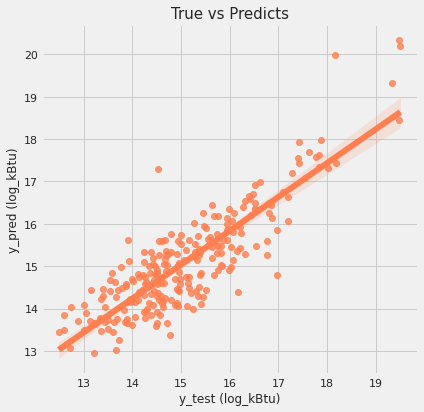

In [ ]:
plt.figure(figsize = ( 6 , 6 )) 
  
sns.regplot(x=y_test, y=y_pred_ridge, color='coral') #true vs predict
  
plt.xlabel( "y_test (log_kBtu)" , size = 12 ) 
  
plt.ylabel(  "y_pred (log_kBtu)"  , size = 12 ) 
  
plt.title( "True vs Predicts" , size = 15 ) 
  
plt.show() 

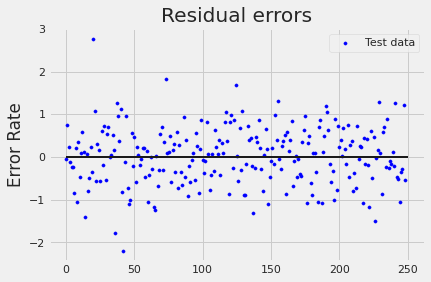

In [ ]:
df_y_pred_ridge = pd.DataFrame(y_pred_ridge)

# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 

## plotting residual errors in test data
plt.scatter(x=df_y_pred.index, y=lr.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 250, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.ylabel('Error Rate')
plt.title("Residual errors")

 
## function to show plot
plt.show()


In [ ]:
#Evaluation du modèle Regression Ridge 
# sur le jeu train en cross validation :
print ('MSE_BaselineCV vs RidgeCV:', errors_MSE[index])
print ('r2_BaselineCV vs RidgeCV:', squared_r[index])

#Evaluation du modèle sur le test :
print ('R2_test:', r2_score (y_test, y_pred_ridge))
print ('MSE_test:', mean_squared_error (y_test, y_pred_ridge))


MSE_BaselineCV vs RidgeCV: [0.4674629098609889, 0.46745154871971656]
r2_BaselineCV vs RidgeCV: [0.6938537729319632, 0.6938707332772169]
R2_test: 0.7363999147612268
MSE_test: 0.4531537245943624


Le chemin de régularisationnous permet de réduire légèrement les poids des variables via un alpha optimal en cross validation. Cet alpha optimal nous permet de corriger légèrement le modèle (réduction de la MSE) en réduisant les poids des variables. 

Les résultats des régressions baselineCV et RidgeCV sont très proches mais il est important de régulariser pour rendre le modèle plus généralisable.  

### Lasso
Réduction des poids des variables, réduction de dimensions supervisée  (modèle parcimonieux) 

In [ ]:
#Entraînement du lasso sur le jeu d'entraînement 
n_alphas = 200
a = np.logspace(-3, 3, n_alphas)
lasso = linear_model.Lasso() 

coefs_l = []
errors_l = []
squared_r_l=[]

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train) 
    coefs_l.append(lasso.coef_)
    score_MSE_l =cross_val_score (lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    score_r2_l=cross_val_score (lasso, X_train, y_train, cv=5, scoring='r2')
    coefs.append(lasso.coef_)
    squared_r_l.append([np.mean(r2_lr_baseline), np.mean(score_r2_l)])
    errors_l.append([np.mean(MSE_lr_baseline*(-1)), -np.mean(score_MSE_l)])
  

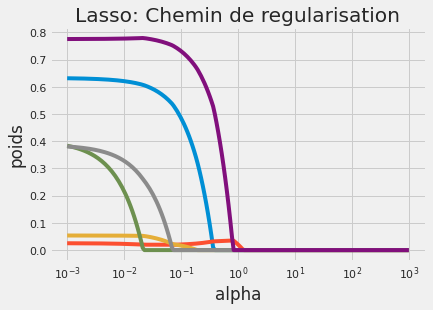

In [ ]:
#Chemin de régularisation 
ax = plt.gca()

ax.plot(alphas, coefs_l)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('poids')
plt.title('Lasso: Chemin de regularisation')
plt.axis('tight')
plt.show()

In [ ]:
 errors_l

[[0.4674629098609889, 0.4674922393752012],
 [0.4674629098609889, 0.46749638776084446],
 [0.4674629098609889, 0.4675011380683126],
 [0.4674629098609889, 0.46750657880532465],
 [0.4674629098609889, 0.46751281158030283],
 [0.4674629098609889, 0.4675199530477916],
 [0.4674629098609889, 0.4675281371432285],
 [0.4674629098609889, 0.4675373702985466],
 [0.4674629098609889, 0.46754812484983993],
 [0.4674629098609889, 0.4675604552344234],
 [0.4674629098609889, 0.467574594300188],
 [0.4674629098609889, 0.46759080944322184],
 [0.4674629098609889, 0.46760940774411336],
 [0.4674629098609889, 0.467630741868617],
 [0.4674629098609889, 0.46765521684647837],
 [0.4674629098609889, 0.4676832978591764],
 [0.4674629098609889, 0.4677155191867966],
 [0.4674629098609889, 0.4677524944866326],
 [0.4674629098609889, 0.4677949286018118],
 [0.4674629098609889, 0.467843631127767],
 [0.4674629098609889, 0.4678995319983219],
 [0.4674629098609889, 0.46796369939211724],
 [0.4674629098609889, 0.46803736030492865],
 [0.4

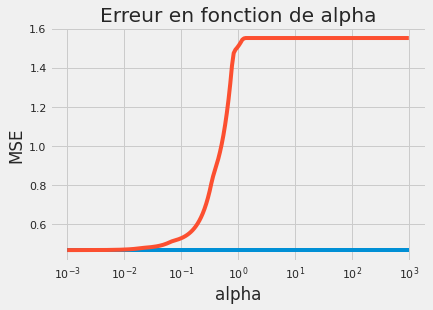

In [ ]:

ax = plt.gca()

ax.plot(alphas, errors_l)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.axis('tight')
plt.title('Erreur en fonction de alpha')
plt.show()

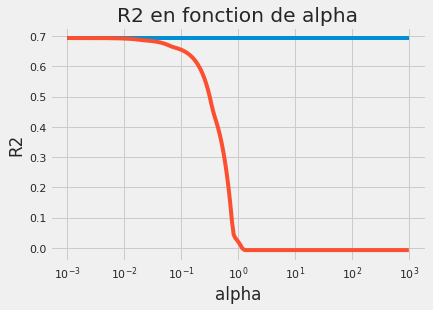

In [ ]:

ax = plt.gca()

ax.plot(alphas, squared_r_l)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('R2')
plt.axis('tight')
plt.title('R2 en fonction de alpha')
plt.show()

In [ ]:
min(errors_l) 

[0.4674629098609889, 0.4674922393752012]

In [ ]:
#alpha optimal 
index=min_alpha(errors_l)
index


0

In [ ]:
errors_l[index]

[0.4674629098609889, 0.4674922393752012]

In [ ]:
alphas[index]

0.001

In [ ]:
#j'applique le meilleur alpha sur le modèle lasso:

lasso = linear_model.Lasso(alpha=alphas[index])
%timeit lasso.fit(X_train, y_train)


1000 loops, best of 5: 1.87 ms per loop


In [ ]:
coefs_l[index] # coefficients régularisés par le lasso (alpha optimal)

array([0.6314329 , 0.02517049, 0.05362995, 0.38356956, 0.38072766,
       0.77553726])

In [ ]:
lasso.coef_

array([0.6314329 , 0.02517049, 0.05362995, 0.38356956, 0.38072766,
       0.77553726])

In [ ]:
# j'applique le lasso avec le meilleur alpha pour les prédictions
y_pred_lasso=lasso.predict(X_test)

In [ ]:
#Evaluation du modèle Lasso:
# sur le jeu train en cross validation :
print ('MSE_BaselineCV vs LassoCV:', errors_MSE[index])
print ('r2_BaselineCV vs LassoCV:', squared_r[index])

#Evaluation du modèle sur le test :
print ('R2_test:', r2_score (y_test, y_pred_lasso))
print ('MSE_test:', mean_squared_error (y_test, y_pred_lasso))



MSE_BaselineCV vs LassoCV: [0.4674629098609889, 0.4674628906857093]
r2_BaselineCV vs LassoCV: [0.6938537729319632, 0.6938537934829467]
R2_test: 0.7367196732535783
MSE_test: 0.4526040292039056


In [ ]:
#Je récupère les coeff appliqués aux variables par le lasso 
df_coef_lasso= pd.DataFrame(lasso.coef_, index=X_train.columns)

In [ ]:
df_coef_lasso.columns=['Lasso']
df_coef_lasso

,Lasso
Enc_LargestPropertyType,0.631433
enc_Year_slice,0.025170
enc_NbFloors,0.053630
Bin_SteamUse(kBtu),0.383570
Bin_NaturalGas(kBtu),0.380728
log_LargestPropertyUseTypeGFA,0.775537


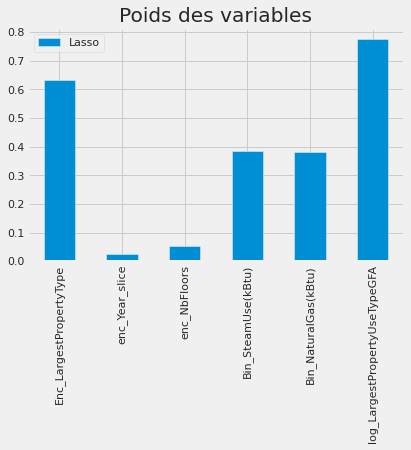

In [ ]:
df_coef_lasso.plot.bar(title='Poids des variables')

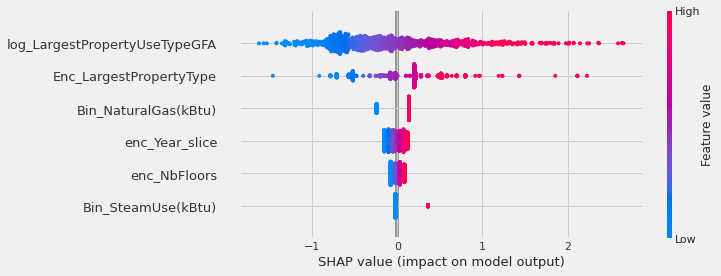

In [ ]:
explainer = shap.LinearExplainer(lasso, X_train)
shap_values = explainer.shap_values(X_train)
f = plt.figure()
shap.summary_plot(shap_values, X_train)

### Interprétations des modèles linéaires


La régularisation de norme 2 (Ridge) permet de régulariser le modèle et réduit légèrement l'erreur.La régularisation de norme 1 (Lasso) est faible (alpha:0,01). 

L'erreur la plus faible est obtenue par la régularisation Ridge (modèle linéaire le plus régularisé).

L'erreur est faiblement diminué par les régularisations.Le coefficient de détermination R2 varie faiblement tout comme la MSE puisque sa variation dépend de la variation de l'erreur du modèle.

 Les coefficients des variables nous informent sur l'importance des variables dans ce modèle. Les poids les plus importants sont : l'usage du bâtiment (PropertyType), la surface(PropertyGFA).

L'utilisation de la vapeur d'eau et du gaz naturel ont des poids modérés. Les années de construction et le nb d'étages sont de faible poids dans ce modèle. 

Si on analyse avec les Shap values, l'importance de la vapeur d'eau est la plus négligeable dans le modèle linéaire. 


### Régression non linéaire : Random Forest Regressor


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 40)

In [ ]:
# Entraînement du modèle sur le jeu d'entraînement 
%timeit rf.fit(X_train, y_train)

1 loop, best of 5: 313 ms per loop


In [ ]:
rf.score(X_train, y_train)

0.9584064054631691

In [ ]:
MSE_RF= cross_val_score (rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error') 
MSE_RF

array([-0.43245054, -0.57370602, -0.41919902, -0.45361688, -0.5031529 ])

In [ ]:
MSE_RF
np.mean(MSE_RF*(-1))

0.47642507298648695

In [ ]:
# Application du modèle sur le jeu test
y_pred_rf=rf.predict(X_test)

In [ ]:
#Evaluation modèle RF sur le train:
print ('MSE_Random Forest (train cv):', np.mean(MSE_RF*(-1)))

#Evaluation du modèle sur le test
print ('MSE_Random Forest(test):', mean_squared_error (y_test, y_pred_rf))


#MSE_RandomForest =mean_squared_error (y_test, y_pred_rf)


MSE_Random Forest (train cv): 0.47642507298648695
MSE_Random Forest(test): 0.4802666328357719


In [ ]:
rf.feature_importances_ 

array([0.21444792, 0.05582591, 0.02939728, 0.00450323, 0.02344572,
       0.67237994])

 96%|=================== | 952/992 [00:20<00:00]       

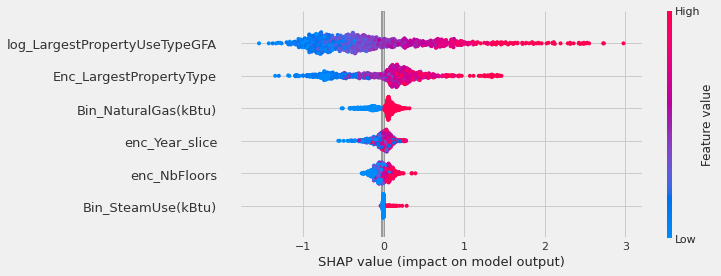

In [ ]:
explainer = shap.TreeExplainer(rf, X_train)
shap_values = explainer.shap_values(X_train)
f = plt.figure()
shap.summary_plot(shap_values, X_train)

In [ ]:
df_Features_importance_RF= pd.DataFrame(rf.feature_importances_ , index=X_train.columns)
df_Features_importance_RF.columns=['Random Forest (baseline)']

La MSE en CV est léfèrement moins bonne que sur les modèles linéaires. 
 On peut facilement optimiser le modèle Random Forest regressor avec Random Search pour la recherche des hyperparamètres sur le train en CV et voir si on minimise l'erreur.

### RandomForest Regressor avec RandomizedSearchCV

In [ ]:
#paramètres à tester
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 900, num = 30)] # nb d'arbres. je test 30 estimateurs 
max_features = ['auto'] # nb de variables à garder à chaque noeud. On peut mentionner le nb de variables à garder
max_depth = [int(x) for x in np.linspace(5, 50, num = 10)] #nb étages dans l'arbre : je test 10 estimateurs
min_samples_split = [2, 5, 10] #nb échantillons minimum par feuille pour créer un noeud 
min_samples_leaf = [1, 2, 4] # permet de limiter la profondeur de l'arbre et donc l'overfitting 
bootstrap = [True, False] # randomnisation et aggrégation des résultats : permet d'éviter l'overfitting

In [ ]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
              



Randomized Search training

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation, 
# search across 30 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 5, verbose=2, random_state=30, n_jobs = -1, scoring=['neg_mean_squared_error','r2'], refit='neg_mean_squared_error') #refit: cherche à optimiser la mse # par défaut le score est le R2 mais comme le modèle n'est pa slinéaire il faut changer 
# Fit the random search model
rf_random.fit(X_train, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 127, 155, 182,
                                                         210, 237, 265, 293,
                                                         320, 348, 375, 403,
                                                         431, 458, 486, 513,
                                                         541, 568, 596, 624,
                                                         651, 679, 706, 734,
                                         

J'obtiens ainsi les hyperparamètres optimisés. 

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 25,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 513}

In [ ]:
n_estimators = rf_random.best_params_['n_estimators']
min_samples_split=  rf_random.best_params_['min_samples_split']
min_samples_leaf=rf_random.best_params_['min_samples_leaf']
max_features=rf_random.best_params_['max_features']
max_depth =rf_random.best_params_['max_depth']
bootstrap =rf_random.best_params_['bootstrap']

In [ ]:
# Applications des best_params du randomizedSearchCV

rf_best = RandomForestRegressor(n_estimators = n_estimators,
min_samples_split= min_samples_split,
min_samples_leaf= min_samples_leaf,
max_features= max_features,
max_depth = max_depth,
bootstrap = bootstrap)

# Fit the random search model
%timeit rf_best.fit(X_train, y_train)

1 loop, best of 5: 1.26 s per loop


In [ ]:
# Evaluation de la RF: MSE 
MSE_RF_best=(rf_random.best_score_)*(-1)
MSE_RF_best


0.4578011713915524

In [ ]:
 y_pred_best= rf_best.predict(X_test)

In [ ]:
#% d'importance des variables dans le modèle RF via Feature importance:
rf_best.feature_importances_



array([0.22432789, 0.03882028, 0.01853108, 0.00346253, 0.02077013,
       0.69408809])

In [ ]:
df_Features_importance_RF_Best= pd.DataFrame(rf_best.feature_importances_, index=X_train.columns)
df_Features_importance_RF_Best.columns=['Random Forest (best)']
df_Features_importance_RF_Best



,Random Forest (best)
Enc_LargestPropertyType,0.224328
enc_Year_slice,0.038820
enc_NbFloors,0.018531
Bin_SteamUse(kBtu),0.003463
Bin_NaturalGas(kBtu),0.020770
log_LargestPropertyUseTypeGFA,0.694088


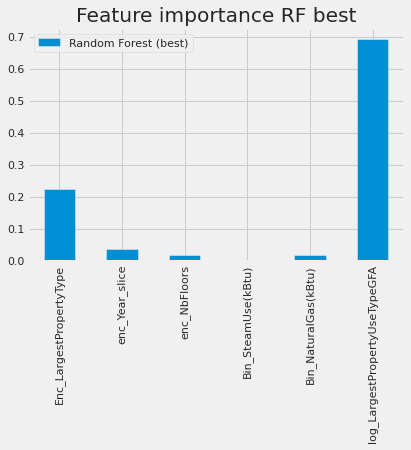

In [ ]:
df_Features_importance_RF_Best.plot.bar(title='Feature importance RF best')

 99%|===================| 984/992 [01:02<00:00]       

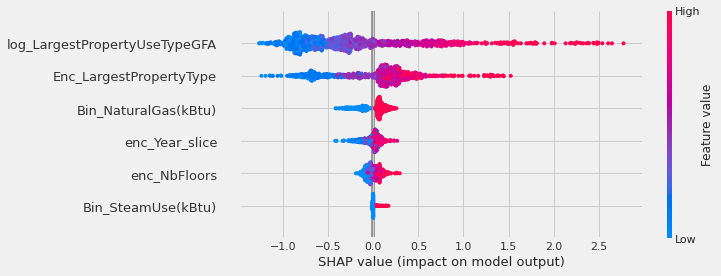

In [ ]:
explainer = shap.TreeExplainer(rf_best, X_train)
shap_values = explainer.shap_values(X_train)
f = plt.figure()
shap.summary_plot(shap_values, X_train)

 98%|===================| 245/249 [00:15<00:00]       

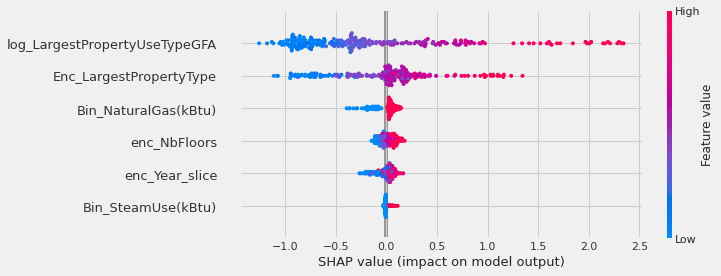

In [ ]:
explainer = shap.TreeExplainer(rf_best, X_test)
shap_values = explainer.shap_values(X_test)
f = plt.figure()
shap.summary_plot(shap_values, X_test)

In [ ]:
Features_results= pd.concat([df_coef_lr,df_coef_ridge_b, df_coef_lasso, df_Features_importance_RF,df_Features_importance_RF_Best], axis=1)
Features_results

,lr Baseline,Ridge,Lasso,Random Forest (baseline),Random Forest (best)
Enc_LargestPropertyType,0.632611,0.631220,0.631433,0.214448,0.224328
enc_Year_slice,0.025429,0.025431,0.025170,0.055826,0.038820
enc_NbFloors,0.053698,0.054483,0.053630,0.029397,0.018531
Bin_SteamUse(kBtu),0.402141,0.393692,0.383570,0.004503,0.003463
Bin_NaturalGas(kBtu),0.386596,0.384249,0.380728,0.023446,0.020770
log_LargestPropertyUseTypeGFA,0.775351,0.774547,0.775537,0.672380,0.694088


In [ ]:

#Evaluation du modèle RF best params  sur le test :

print ('MSE_test:', mean_squared_error (y_test, y_pred_best))


MSE_test: 0.46641313589081473


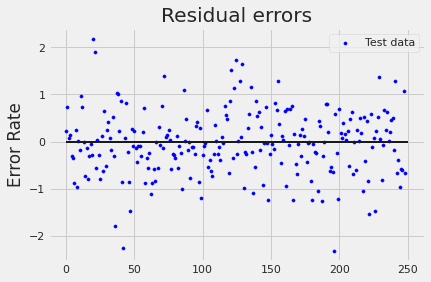

In [ ]:
df_ypredRF_best = pd.DataFrame(y_pred_best)

# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 

## plotting residual errors in test data
plt.scatter(x=df_ypredRF_best.index, y=rf_best.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 250, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.ylabel('Error Rate')
plt.title("Residual errors")

 
## function to show plot
plt.show()


## Choix du modèle : Random Forest Regressor (CV, best params)

In [ ]:

print( "MSE_RandomForest_Bestparams: " , (MSE_RF_best))
# Repasser les MSE en KbTU
from math import exp
print("MSE(kBtU) Random Forest Regressor (Best_params, CV:", exp(MSE_RF_best))
print ('MSE(kBtu)_test:', exp(mean_squared_error (y_test, y_pred_best)))


MSE_RandomForest_Bestparams:  0.4578011713915524
MSE(kBtU) Random Forest Regressor (Best_params, CV: 1.58059470437108
MSE(kBtu)_test: 1.5942655116139286



Le meilleur modèle est celui de Random Forest avec optimisation des paramètres. 
La MSE est la plus faible pour la RF. le temps d'entrainement est 10 fois supérieur mais comme le jeu de données est petit je choisis quand même ce modèle. 

Les variables les plus importantes dans le modèle, quelque soit le modèle linaire ou non linéaires sont : l'usage du bâtiment (PropertyType), la surface (propertyTypeGFA) et l'utilisation du gaz. Dans la RF par rapport aux modèles linéaires vus ici, l'ancienneté du bâtiment (Year_slice) a plus de poids que le nb d'étages. 

Le meilleur modèle linéaire est Ridge MSE légèrement inférieure à la baseline et présente l'avantage d'être régularisé. 

Les variables qui ont le plus de poids dans le modèle choisi pour les prédictions de l'énergie totale sont la surface, l'utilisation des bâtiments et l'ancienneté du bâtiment.  

In [ ]:
# Repasser les MSE en KbTU
from math import exp

print("MSE(kBtU) Random Forest Regressor (Best_params, CV:", exp(MSE_RF_best))


MSE(kBtU) Random Forest Regressor (Best_params, CV: 1.58059470437108


## Importance des variables dans le modèle choisi (RForest)

En utilisant  SelectFromModel  avec un seuil d'importance choisi à l'aide de l'argument  threshold  , on peut créer une sélection des features qui sont les plus importantes à la création d'un modèle.

In [ ]:
from sklearn.feature_selection import SelectFromModel #Meta-transformer for selecting features based on importance weights.

In [ ]:
#SelectFrom Model: la stringence de la sélection dépend du seuil appliqué (défaut: seuil=moyenne des coef)
 
selector = SelectFromModel(estimator=rf_best).fit(X_train, y_train) # threshold par défaut

In [ ]:
selector.threshold_ # seuil= moyenne des coefficients par défaut

0.16666666666666666

In [ ]:
selector.get_support()


array([ True, False, False, False, False,  True])

In [ ]:
# Pour récupérer les variables selectionnées ou non (array True ou Flase)
list_columns=X_train.columns
new_columns=[]
for i, columns in enumerate (list_columns):
  if selector.get_support()[i]== True :
    new_columns.append(columns)

In [ ]:
new_columns

['Enc_LargestPropertyType', 'log_LargestPropertyUseTypeGFA']

In [ ]:
X_train_2= selector.transform(X_train)

In [ ]:
df_Xtrain_2 = pd.DataFrame(X_train_2, columns=new_columns)  # columns=new_columns : récupérer les noms de colonnes du df

In [ ]:
df_Xtrain_2

,Enc_LargestPropertyType,log_LargestPropertyUseTypeGFA
0,14.027878,10.966645
1,15.624807,11.106280
2,14.813198,10.736397
3,14.027878,10.949051
4,15.167983,12.548122
...,...,...
987,14.813198,9.587749
988,14.051592,9.615805
989,15.415933,10.473365
990,13.951812,10.149566


Le modèle RF avec SelectModel propose seulement 2 variables (celles qui ont les poids les plus forts) : parcimonieux , moins complexe.
ET si je fais un nouveau modèle Random Forest avec 2 variables ?


## Test modèle Random Forest d'après résultats de Select From Model

In [ ]:
# data pour la régression: attention ce n'est que sur 80% des données car je reprends que le train qui contient le mean encod
data_reg=data_reg[['Enc_LargestPropertyType', 'log_LargestPropertyUseTypeGFA','log_SiteEnergyUse(kBtu)']]

X=data_reg[data_reg.columns[:-1]]
y=data_reg['log_SiteEnergyUse(kBtu)']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

In [ ]:
rf_ = RandomForestRegressor(n_estimators = 100, random_state = 40) 

In [ ]:
MSE_RF_SFM= cross_val_score (rf_, X_train, y_train, cv=5, scoring='neg_mean_squared_error') 

In [ ]:
MSE_RF_SFM

array([-0.69379215, -0.55054291, -0.546464  , -0.51230349, -0.69534323])

In [ ]:
%timeit rf.fit(X_train, y_train) 

1 loop, best of 5: 224 ms per loop


In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 900, num = 20)] 
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 10)] 

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10] 
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4] 
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
              

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation, 
# search across 50 different combinations, and use all available cores
rf_random_SFM = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 5, verbose=2, random_state=30, n_jobs = -1, scoring=['neg_mean_squared_error','r2'], refit='neg_mean_squared_error') #refit: cherhce à optimiser la mse # par défaut le score est le R2 mais comme le modèle n'est pa slinéaire il faut changer 
# Fit the random search model
rf_random_SFM.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 236, 273, 310,
                                                         347, 384, 421, 457,
                                                         494, 531, 568, 605,
                                                         642, 678, 715, 752,
                                                         789, 826, 863, 900]},
                   random_state=30, refit='neg_mean_squared_error',
                   scoring=['neg_mean_squared_er

In [ ]:
rf_random_SFM.best_params_

{'bootstrap': True,
 'max_depth': 25,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 863}

In [ ]:
n_estimators = rf_random_SFM.best_params_['n_estimators']
min_samples_split=  rf_random_SFM.best_params_['min_samples_split']
min_samples_leaf=rf_random_SFM.best_params_['min_samples_leaf']
max_features=rf_random_SFM.best_params_['max_features']
max_depth =rf_random_SFM.best_params_['max_depth']
bootstrap =rf_random_SFM.best_params_['bootstrap']

In [ ]:
# Applications des best_params du randomizedSearchCV

rf_SFM_best = RandomForestRegressor(n_estimators = n_estimators , min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, max_depth =max_depth ,bootstrap =bootstrap )

# Fit the random search model
%timeit rf_SFM_best.fit(X_train, y_train)

1 loop, best of 5: 1.54 s per loop


In [ ]:
MSE_RF_best=rf_random_SFM.best_score_
MSE_RF_best*(-1)

0.5209168992535822

Le modéle RF avec les deux variables sélectionnées est plus simple mais moins bon car la MSE est supérieure à la baseline. Donc les variables de faible poids ont une importance dans la qualité du modèle. 